# Anomaly Detection

Demo Notebooks SAM and Grounded DINO
- https://github.com/xinyu1205/recognize-anything/blob/main/recognize_anything_demo.ipynb
- https://github.com/xinyu1205/recognize-anything/blob/main/gui_demo.ipynb

In [2]:
import os
import sys
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from masked_autoencoder_vit import mae_vit_base_patch16, mae_vit_large_patch16

from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from timm.models.vision_transformer import PatchEmbed, Block
from functools import partial
from PIL import Image, ImageDraw, ImageFont

from detect_anything_grounded_dino import (
    extract_objects_from_bounding_boxes,
    inference,
    load_ram,
    load_tag2text,
    load_grounding_dino,
    # load_sam  
)

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


## Recognize Anything

In [ ]:
%%capture
# usually takes around 1min on RTX 3090
ram_model = load_ram(device)
tag2text_model = load_tag2text(device)
grounding_dino_model = load_grounding_dino(device)
# sam_model = load_sam(device)

def inference_with_ram(img, do_det_seg):
    return inference(img, None, do_det_seg, "RAM", ram_model, grounding_dino_model, label_with_probab=False, device=device)

def inference_with_t2t(img, input_tags, do_det_seg):
    return inference(img, input_tags, do_det_seg, "Tag2Text", tag2text_model, grounding_dino_model, label_with_probab=False, device=device)

-----

Start processing, image size (2068, 1450)
Tags:  adult, bear, bear cub, brown, brown bear, cub, huddle, lake, shore, sit, water


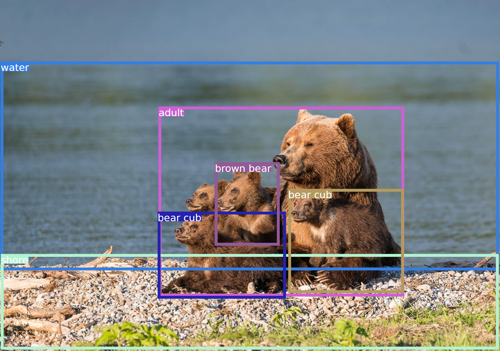

-----

Start processing, image size (2048, 1365)
Tags:  brown, chase, sheepdog, corgi, dog, field, grass, grassy, neckband, red, run, white


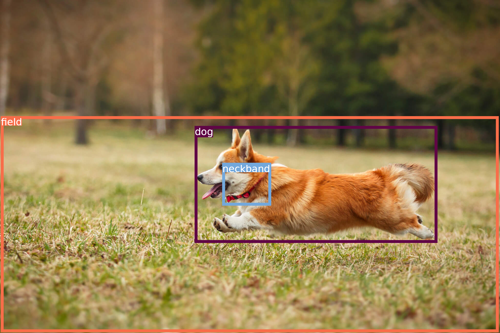

-----

Start processing, image size (3295, 1846)
Tags:  bar stool, chair, color, draw, floor, mall, stool, store


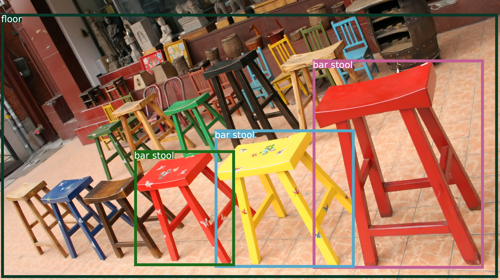

-----

Start processing, image size (1072, 603)
Tags:  beach, black, brown, carry, chase, dog, mouth, sea, play, run, sand, stick, toy


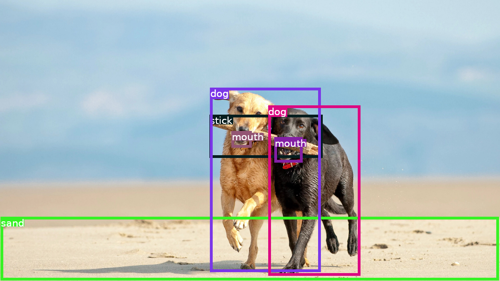

-----

Start processing, image size (3000, 1999)
Tags:  ball, bat, cricket, cricket team, cricketer, game, man, play, player, referee, stand, test, wicket


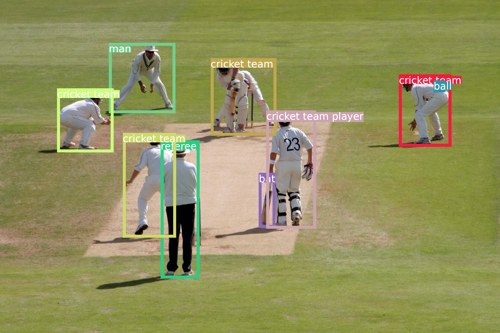

-----

Start processing, image size (2048, 1364)
Tags:  cat, floor, jump, paw, play, stand


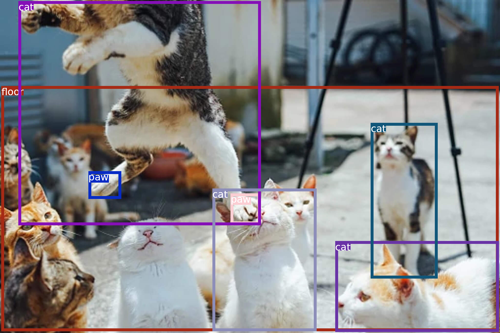

-----

Start processing, image size (2048, 1367)
Tags:  dust, field, horse, grassy, herd, hillside, lush, plain, run, wild


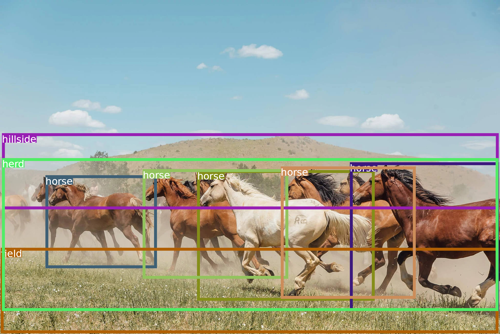

-----

Start processing, image size (2500, 1661)
Tags:  figurine, frog, green, log, miniature, puddle, reflection, stone, sit, snail, tortoise, tree frog, turtle, water


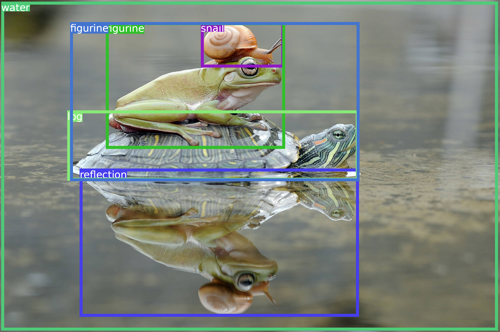

-----

Start processing, image size (3000, 2155)
Tags:  armchair, blanket, lamp, carpet, couch, dog, floor, furniture, gray, green, living room, picture frame, pillow, plant, room, sit, stool, wood floor


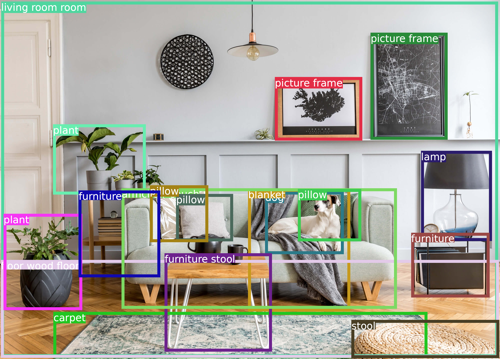

CPU times: user 3.31 s, sys: 110 ms, total: 3.42 s
Wall time: 3.28 s


In [39]:
%%time
objects_pool = []
objects_pool_path = "objects_pool/all_images"
if not os.path.exists(objects_pool_path):
    os.mkdir(objects_pool_path)

n = 10
for i in range(1, n):
    # Open Image
    in_img = Image.open(f"Grounded-Segment-Anything/assets/demo{i}.jpg")
    print("-----\n")

    # Return tags, bounding boxes, and labels
    ram_tags, ram_out_image, pred_phrases, boxes_filt = inference_with_ram(in_img, do_det_seg=True)
    
    #Display image
    ram_out_image.thumbnail((500, 500)); display(ram_out_image.convert("RGB"))
    
    # Get object images from using bounding boxes
    current_object_images = extract_objects_from_bounding_boxes(in_img, boxes_filt)

    # Save images to list
    # objects_pool.extend([(obj, phrase[0]) for obj, phrase in zip(current_object_images, pred_phrases)])

    # Save object images to folder
    for idx, obj_image in enumerate(current_object_images, start=1):
        save_path = os.path.join(objects_pool_path, f"demo{i}_object{idx}.jpg")
        obj_image.convert("RGB").save(save_path)

## Masked AutoEncoder (Scalable Vision Learners)

Demo notebook: https://colab.research.google.com/github/facebookresearch/mae/blob/main/demo/mae_visualize.ipynb

cuda


In [6]:
# # Data transformations (you can adjust as needed)
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
# ])

# # Load dataset
# dataset = datasets.ImageFolder(root='objects_pool/', transform=transform)

# # Split dataset into train and validation (you can adjust split ratio)
# train_size = int(0.8 * len(dataset))
# val_size = len(dataset) - train_size
# train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# # Create data loaders
# train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [7]:
# def train_epoch(model, dataloader, criterion, optimizer, device):
#     model.train()
#     running_loss = 0.0
#     for imgs, _ in dataloader:  # we don't need labels
#         imgs = imgs.to(device)
        
#         # Forward pass
#         loss, _, _ = model(imgs)
        
#         # Backward pass and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#         running_loss += loss.item() * imgs.size(0)
#     return running_loss / len(dataloader.dataset)

# def validate_epoch(model, dataloader, device):
#     model.eval()
#     running_loss = 0.0
#     with torch.no_grad():
#         for imgs, _ in dataloader:
#             imgs = imgs.to(device)
#             loss, _, _ = model(imgs)
#             running_loss += loss.item() * imgs.size(0)
#     return running_loss / len(dataloader.dataset)

In [8]:
# # Initialize model, criterion and optimizer
# model = mae_vit_large_patch16().to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# num_epochs = 20
# for epoch in range(num_epochs):
#     train_loss = train_epoch(model, train_loader, None, optimizer, device)  # criterion is not passed as it's internal to the model
#     val_loss = validate_epoch(model, val_loader, device)
#     print(f"Epoch [{epoch+1}/{num_epochs}] | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

# # Save the trained model
# torch.save(model.state_dict(), "masked_autoencoder_vit.pth")

Epoch [1/20] | Train Loss: 0.7964 | Val Loss: 0.1703
Epoch [2/20] | Train Loss: 0.1284 | Val Loss: 0.0729
Epoch [3/20] | Train Loss: 0.0738 | Val Loss: 0.0746
Epoch [4/20] | Train Loss: 0.0790 | Val Loss: 0.0817
Epoch [5/20] | Train Loss: 0.0889 | Val Loss: 0.0904
Epoch [6/20] | Train Loss: 0.0948 | Val Loss: 0.0862
Epoch [7/20] | Train Loss: 0.0879 | Val Loss: 0.0768
Epoch [8/20] | Train Loss: 0.0796 | Val Loss: 0.0721
Epoch [9/20] | Train Loss: 0.0745 | Val Loss: 0.0696
Epoch [10/20] | Train Loss: 0.0709 | Val Loss: 0.0671
Epoch [11/20] | Train Loss: 0.0684 | Val Loss: 0.0655
Epoch [12/20] | Train Loss: 0.0690 | Val Loss: 0.0647
Epoch [13/20] | Train Loss: 0.0676 | Val Loss: 0.0625
Epoch [14/20] | Train Loss: 0.0662 | Val Loss: 0.0618
Epoch [15/20] | Train Loss: 0.0647 | Val Loss: 0.0588
Epoch [16/20] | Train Loss: 0.0619 | Val Loss: 0.0586
Epoch [17/20] | Train Loss: 0.0620 | Val Loss: 0.0601
Epoch [18/20] | Train Loss: 0.0631 | Val Loss: 0.0596
Epoch [19/20] | Train Loss: 0.0638 | 

In [9]:
# define the utils

imagenet_mean = np.array([0.485, 0.456, 0.406])
imagenet_std = np.array([0.229, 0.224, 0.225])

def show_image(image, title=''):
    # image is [H, W, 3]
    assert image.shape[2] == 3
    plt.imshow(torch.clip((image * imagenet_std + imagenet_mean) * 255, 0, 255).int())
    plt.title(title, fontsize=16)
    plt.axis('off')
    return

# model.load_state_dict(torch.load(PATH))

def prepare_model(chkpt_dir, arch='mae_vit_large_patch16'):
    # build model
    # model = getattr(models_mae, arch)()
    model = mae_vit_large_patch16().to(device)
    # load model
    checkpoint = torch.load(chkpt_dir, map_location='cpu')
    msg = model.load_state_dict(checkpoint['model'], strict=False)
    print(msg)
    return model

def run_one_image(img, model):
    x = torch.tensor(img)

    # make it a batch-like
    x = x.unsqueeze(dim=0)
    x = torch.einsum('nhwc->nchw', x)

    # run MAE
    loss, y, mask = model(x.float(), mask_ratio=0.75)
    y = model.unpatchify(y)
    y = torch.einsum('nchw->nhwc', y).detach().cpu()

    # visualize the mask
    mask = mask.detach()
    mask = mask.unsqueeze(-1).repeat(1, 1, model.patch_embed.patch_size[0]**2 *3)  # (N, H*W, p*p*3)
    mask = model.unpatchify(mask)  # 1 is removing, 0 is keeping
    mask = torch.einsum('nchw->nhwc', mask).detach().cpu()
    
    x = torch.einsum('nchw->nhwc', x)

    # masked image
    im_masked = x * (1 - mask)

    # MAE reconstruction pasted with visible patches
    im_paste = x * (1 - mask) + y * mask

    # make the plt figure larger
    plt.rcParams['figure.figsize'] = [24, 24]

    plt.subplot(1, 4, 1)
    show_image(x[0], "original")

    plt.subplot(1, 4, 2)
    show_image(im_masked[0], "masked")

    plt.subplot(1, 4, 3)
    show_image(y[0], "reconstruction")

    plt.subplot(1, 4, 4)
    show_image(im_paste[0], "reconstruction + visible")

    plt.show()

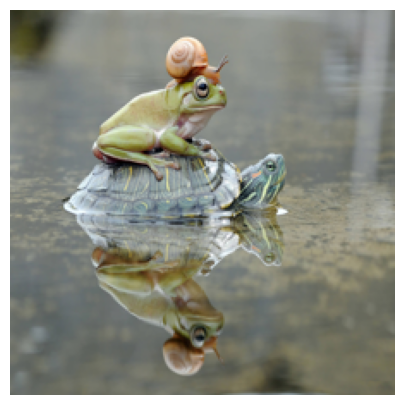

In [4]:
# load an image
img = Image.open(f"Grounded-Segment-Anything/assets/demo8.jpg")
img = img.resize((224, 224))
img = np.array(img) / 255.

assert img.shape == (224, 224, 3)

# normalize by ImageNet mean and std
img = img - imagenet_mean
img = img / imagenet_std

plt.rcParams['figure.figsize'] = [5, 5]
show_image(torch.tensor(img))

In [10]:
chkpt_dir = './pretrained/mae_finetuned_vit_large.pth'
model_mae = prepare_model(chkpt_dir, 'mae_vit_large_patch16')
print('Model loaded.')

RuntimeError: Error(s) in loading state_dict for MaskedAutoencoderViT:
	Missing key(s) in state_dict: "mask_token", "decoder_pos_embed", "norm.weight", "norm.bias", "decoder_embed.weight", "decoder_embed.bias", "decoder_blocks.0.norm1.weight", "decoder_blocks.0.norm1.bias", "decoder_blocks.0.attn.qkv.weight", "decoder_blocks.0.attn.qkv.bias", "decoder_blocks.0.attn.proj.weight", "decoder_blocks.0.attn.proj.bias", "decoder_blocks.0.norm2.weight", "decoder_blocks.0.norm2.bias", "decoder_blocks.0.mlp.fc1.weight", "decoder_blocks.0.mlp.fc1.bias", "decoder_blocks.0.mlp.fc2.weight", "decoder_blocks.0.mlp.fc2.bias", "decoder_blocks.1.norm1.weight", "decoder_blocks.1.norm1.bias", "decoder_blocks.1.attn.qkv.weight", "decoder_blocks.1.attn.qkv.bias", "decoder_blocks.1.attn.proj.weight", "decoder_blocks.1.attn.proj.bias", "decoder_blocks.1.norm2.weight", "decoder_blocks.1.norm2.bias", "decoder_blocks.1.mlp.fc1.weight", "decoder_blocks.1.mlp.fc1.bias", "decoder_blocks.1.mlp.fc2.weight", "decoder_blocks.1.mlp.fc2.bias", "decoder_blocks.2.norm1.weight", "decoder_blocks.2.norm1.bias", "decoder_blocks.2.attn.qkv.weight", "decoder_blocks.2.attn.qkv.bias", "decoder_blocks.2.attn.proj.weight", "decoder_blocks.2.attn.proj.bias", "decoder_blocks.2.norm2.weight", "decoder_blocks.2.norm2.bias", "decoder_blocks.2.mlp.fc1.weight", "decoder_blocks.2.mlp.fc1.bias", "decoder_blocks.2.mlp.fc2.weight", "decoder_blocks.2.mlp.fc2.bias", "decoder_blocks.3.norm1.weight", "decoder_blocks.3.norm1.bias", "decoder_blocks.3.attn.qkv.weight", "decoder_blocks.3.attn.qkv.bias", "decoder_blocks.3.attn.proj.weight", "decoder_blocks.3.attn.proj.bias", "decoder_blocks.3.norm2.weight", "decoder_blocks.3.norm2.bias", "decoder_blocks.3.mlp.fc1.weight", "decoder_blocks.3.mlp.fc1.bias", "decoder_blocks.3.mlp.fc2.weight", "decoder_blocks.3.mlp.fc2.bias", "decoder_blocks.4.norm1.weight", "decoder_blocks.4.norm1.bias", "decoder_blocks.4.attn.qkv.weight", "decoder_blocks.4.attn.qkv.bias", "decoder_blocks.4.attn.proj.weight", "decoder_blocks.4.attn.proj.bias", "decoder_blocks.4.norm2.weight", "decoder_blocks.4.norm2.bias", "decoder_blocks.4.mlp.fc1.weight", "decoder_blocks.4.mlp.fc1.bias", "decoder_blocks.4.mlp.fc2.weight", "decoder_blocks.4.mlp.fc2.bias", "decoder_blocks.5.norm1.weight", "decoder_blocks.5.norm1.bias", "decoder_blocks.5.attn.qkv.weight", "decoder_blocks.5.attn.qkv.bias", "decoder_blocks.5.attn.proj.weight", "decoder_blocks.5.attn.proj.bias", "decoder_blocks.5.norm2.weight", "decoder_blocks.5.norm2.bias", "decoder_blocks.5.mlp.fc1.weight", "decoder_blocks.5.mlp.fc1.bias", "decoder_blocks.5.mlp.fc2.weight", "decoder_blocks.5.mlp.fc2.bias", "decoder_blocks.6.norm1.weight", "decoder_blocks.6.norm1.bias", "decoder_blocks.6.attn.qkv.weight", "decoder_blocks.6.attn.qkv.bias", "decoder_blocks.6.attn.proj.weight", "decoder_blocks.6.attn.proj.bias", "decoder_blocks.6.norm2.weight", "decoder_blocks.6.norm2.bias", "decoder_blocks.6.mlp.fc1.weight", "decoder_blocks.6.mlp.fc1.bias", "decoder_blocks.6.mlp.fc2.weight", "decoder_blocks.6.mlp.fc2.bias", "decoder_blocks.7.norm1.weight", "decoder_blocks.7.norm1.bias", "decoder_blocks.7.attn.qkv.weight", "decoder_blocks.7.attn.qkv.bias", "decoder_blocks.7.attn.proj.weight", "decoder_blocks.7.attn.proj.bias", "decoder_blocks.7.norm2.weight", "decoder_blocks.7.norm2.bias", "decoder_blocks.7.mlp.fc1.weight", "decoder_blocks.7.mlp.fc1.bias", "decoder_blocks.7.mlp.fc2.weight", "decoder_blocks.7.mlp.fc2.bias", "decoder_norm.weight", "decoder_norm.bias", "decoder_pred.weight", "decoder_pred.bias". 
	Unexpected key(s) in state_dict: "head.weight", "head.bias", "fc_norm.weight", "fc_norm.bias". 

In [11]:
model = mae_vit_large_patch16().to(device)
# load model
checkpoint = torch.load(chkpt_dir, map_location='cpu')
print(checkpoint.keys())

dict_keys(['model'])


MAE with pixel reconstruction:


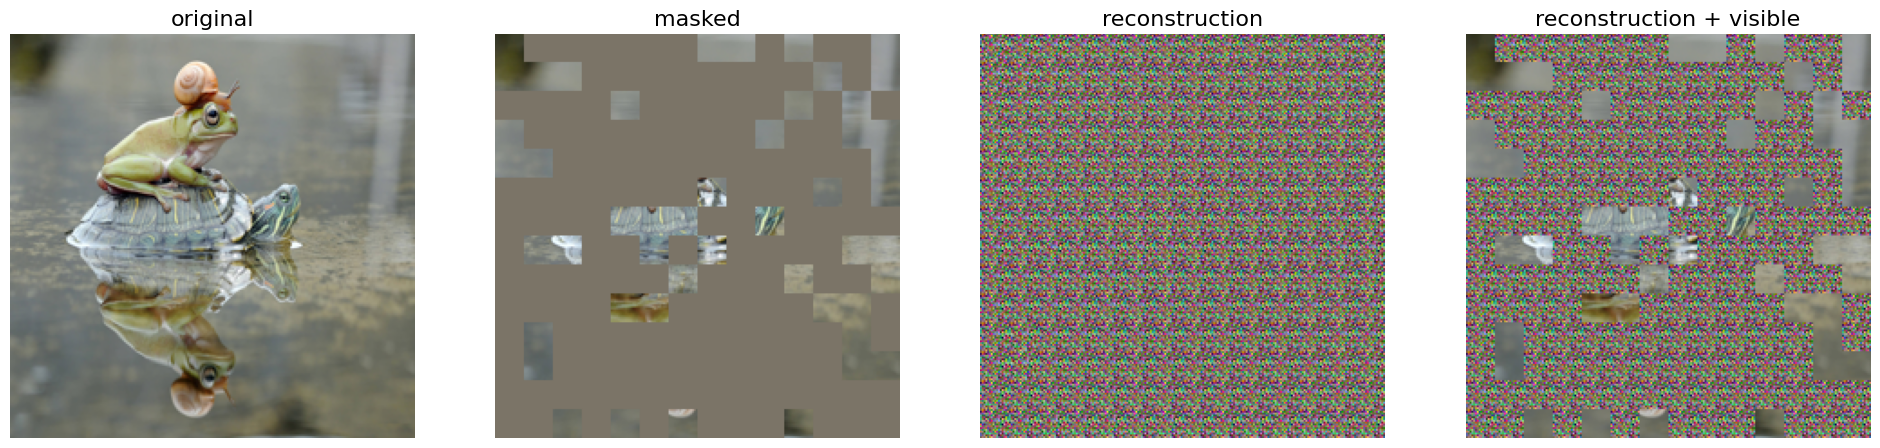

In [16]:
print('MAE with pixel reconstruction:')
run_one_image(img, model_mae)